In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
heartattack_df = pd.read_csv('heart_attack_prediction_dataset.csv')

## Inspecting the Data

In [3]:
heartattack_df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [4]:
heartattack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

## Making a copy of the original DataFrame
* In this case it is advisable to make a copy because of a number of binary columns where values 1 and 0 equates to strings 'Yes' and 'No' respectively.
* It would be easy to call coulmns if we change the binary columns into string columns in one Dataframe.
* And it would be easy for calculation to be done if we keep binary columns in one.
* That's why a copy is advisable.

In [95]:
heartattack_df2 = heartattack_df.copy()


## Binary Columns

In [7]:
heartattack_df[['Alcohol Consumption','Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Previous Heart Problems', 'Medication Use', 'Stress Level']]

,Alcohol Consumption,Diabetes,Family History,Smoking,Obesity,Previous Heart Problems,Medication Use,Stress Level
0,0,0,0,1,0,0,0,9
1,1,1,1,1,1,1,0,1
2,0,1,0,0,0,1,1,9
3,1,1,1,1,0,1,0,9
4,0,1,1,1,1,1,0,6
...,...,...,...,...,...,...,...,...
8758,1,1,1,1,0,1,1,8
8759,0,1,0,0,1,0,0,8
8760,1,0,1,1,1,1,0,5
8761,0,1,0,1,0,1,1,5


## Binary to Strings
* Now we replace the binary values in the appropriate columns with values 'Yes' and 'No'
  

In [8]:
columns_to_convert = ['Alcohol Consumption','Diabetes', 'Family History', 'Smoking', 'Obesity','Previous Heart Problems', 'Medication Use', 'Heart Attack Risk']

In [9]:
mapping = {1: 'Yes', 0: 'No'}
heartattack_df2[columns_to_convert] = heartattack_df2[columns_to_convert].replace(mapping)
heartattack_df2[['Alcohol Consumption','Diabetes', 'Family History', 'Smoking', 'Obesity','Previous Heart Problems', 'Medication Use', 'Heart Attack Risk']]

,Alcohol Consumption,Diabetes,Family History,Smoking,Obesity,Previous Heart Problems,Medication Use,Heart Attack Risk
0,No,No,No,Yes,No,No,No,No
1,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,No,No,No,Yes,Yes,No
3,Yes,Yes,Yes,Yes,No,Yes,No,No
4,No,Yes,Yes,Yes,Yes,Yes,No,No
...,...,...,...,...,...,...,...,...
8758,Yes,Yes,Yes,Yes,No,Yes,Yes,No
8759,No,Yes,No,No,Yes,No,No,No
8760,Yes,No,Yes,Yes,Yes,Yes,No,Yes
8761,No,Yes,No,Yes,No,Yes,Yes,No


In [10]:
heartattack_df2[columns_to_convert] = heartattack_df2[columns_to_convert].astype(str)

In [11]:
heartattack_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   object 
 7   Family History                   8763 non-null   object 
 8   Smoking                          8763 non-null   object 
 9   Obesity                          8763 non-null   object 
 10  Alcohol Consumption              8763 non-null   object 
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

## The Demographic Characteristics of patients who have experienced a heart attack
* Characteristics such as 'Age', 'Sex', 'Income' etc. of the patients with potential Heart Attack Risk are included.

In [12]:
heart_attack_patients = heartattack_df2[heartattack_df2['Heart Attack Risk'] == 'Yes']
demographic_characteristics = heart_attack_patients[['Age', 'Sex', 'Income', 'Country', 'Continent', 'Hemisphere']]
print(demographic_characteristics)

      Age     Sex  Income         Country      Continent           Hemisphere
5      54  Female  241339         Germany         Europe  Northern Hemisphere
6      90    Male  190450          Canada  North America  Northern Hemisphere
7      84    Male  122093           Japan           Asia  Northern Hemisphere
12     77    Male   29886         Vietnam           Asia  Northern Hemisphere
13     60    Male  292173           China           Asia  Northern Hemisphere
...   ...     ...     ...             ...            ...                  ...
8753   82    Male  141521       Australia      Australia  Southern Hemisphere
8754   80  Female  101341       Argentina  South America  Southern Hemisphere
8756   22    Male  230235          Canada  North America  Northern Hemisphere
8760   47    Male   36998          Brazil  South America  Southern Hemisphere
8762   25  Female  247338  United Kingdom         Europe  Northern Hemisphere

[3139 rows x 6 columns]


## Demographic Characteristics for the Male counterparts

In [13]:
demographic_characteristics_male = heartattack_df2[(heartattack_df2['Heart Attack Risk'] == 'Yes') & (heartattack_df['Sex'] == 'Male')]
demographic_characteristics_male[['Age',  'Income', 'Country', 'Continent']] 

,Age,Income,Country,Continent
6,90,190450,Canada,North America
7,84,122093,Japan,Asia
12,77,29886,Vietnam,Asia
13,60,292173,China,Asia
15,73,265839,Italy,Europe
...,...,...,...,...
8747,24,219922,China,Asia
8751,75,228009,Spain,Europe
8753,82,141521,Australia,Australia
8756,22,230235,Canada,North America


## Demographic Characteristics for the Female counterparts

In [14]:
demographic_characteristics_female = heartattack_df2[(heartattack_df2['Heart Attack Risk'] == 'Yes') & (heartattack_df['Sex'] == 'Female')]
demographic_characteristics_female[['Age',  'Income', 'Country', 'Continent']]

,Age,Income,Country,Continent
5,54,241339,Germany,Europe
18,50,21501,United States,North America
30,27,71276,Argentina,South America
35,52,135099,New Zealand,Australia
42,86,202033,Canada,North America
...,...,...,...,...
8730,27,154918,Canada,North America
8739,74,80750,South Africa,Africa
8746,62,252847,Brazil,South America
8754,80,101341,Argentina,South America


## Percentage of Male and Female out of Total patients who are at Heart Attack Risk
* The calculations suggest that the number of Male patients is significantly higher than that of Female patients ,that is, More than double.

In [17]:
heart_attack_patients = heartattack_df2[heartattack_df2['Heart Attack Risk'] == 'Yes']
total_male_patients = heart_attack_patients[heart_attack_patients['Sex'] == 'Male'].shape[0]
total_female_patients = heart_attack_patients[heart_attack_patients['Sex'] == 'Female'].shape[0]

total_patients = heart_attack_patients.shape[0]
percentage_male = (total_male_patients / total_patients) * 100
percentage_female = (total_female_patients / total_patients) * 100
print("Percentage of Male Patients:", percentage_male)
print("Percentage of Female Patients:", percentage_female)

Percentage of Male Patients: 69.92672825740682
Percentage of Female Patients: 30.07327174259318


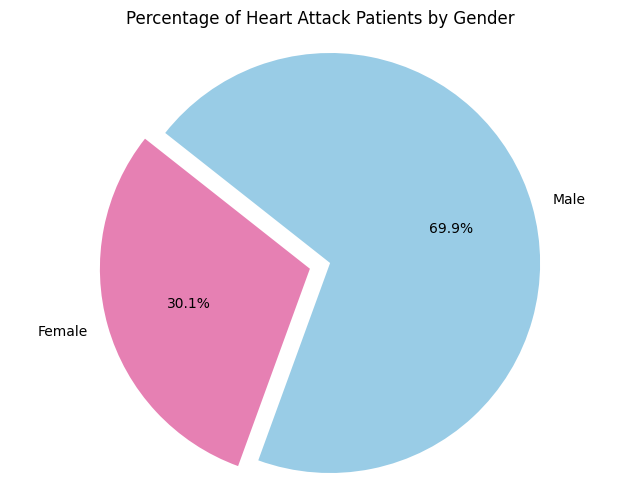

In [107]:
labels = ['Male', 'Female']
sizes = [percentage_male, percentage_female]
colors = [ (0.6, 0.8, 0.9), (0.9, 0.5, 0.7)]
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
sns.set_palette(sns.color_palette(colors)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=250, explode = explode)
plt.title('Percentage of Heart Attack Patients by Gender')


plt.axis('equal') 
plt.show()


## Patients Per Continent
* Here we see an anomaly Europe being one of the smallest continents with the second highest total number of patients.
* This is because of it's high population density.
* Africa although have population only less than Asis but still manages to have significantly lower number of cases.  

In [84]:
total_patients_per_continent = heartattack_df2.groupby('Continent').size().reset_index(name='Total Patients')
top_continents = total_patients_per_continent.sort_values(by = 'Total Patients', ascending = False).head(10)
top_continents

,Continent,Total Patients
1,Asia,2543
3,Europe,2241
5,South America,1362
2,Australia,884
0,Africa,873
4,North America,860


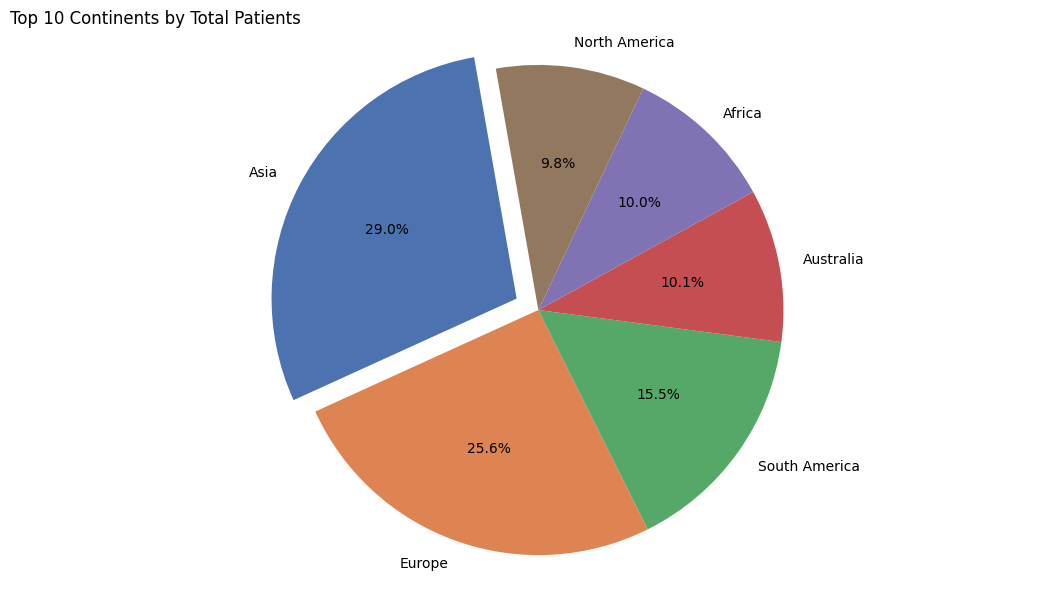

In [94]:
explode = (0.1,) + (0,) * (len(top_continents) - 1)

plt.figure(figsize=(15, 6))
sns.set_palette("deep")

plt.pie(top_continents['Total Patients'], labels=top_continents['Continent'], autopct='%1.1f%%', startangle=100, explode = explode)
plt.title('Top 10 Continents by Total Patients', loc = 'left')

plt.axis('equal')
plt.tight_layout()  
plt.subplots_adjust(left=0.3) 
plt.show()

## Patients Per Country
* With Germany being the country with the highest number of patients closely followed by Argentina and Brazil

In [77]:
total_patients_per_country = heartattack_df2.groupby('Country').size().reset_index(name='Total Patients')
top_10_countries = total_patients_per_country.sort_values(by = 'Total Patients', ascending = False).head(10)
top_10_countries

,Country,Total Patients
7,Germany,477
0,Argentina,471
2,Brazil,462
17,United Kingdom,457
1,Australia,449
12,Nigeria,448
6,France,446
3,Canada,440
4,China,436
11,New Zealand,435


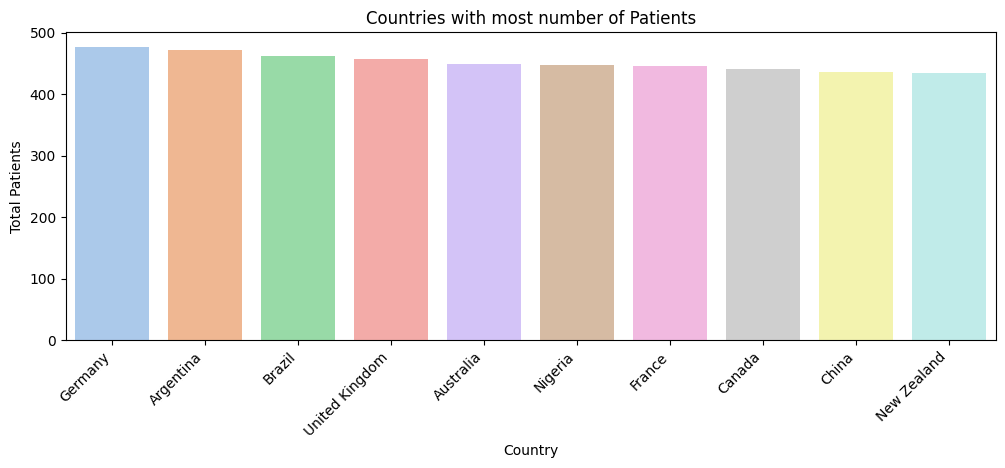

In [81]:

plt.figure(figsize=(12, 4))
sns.set_palette("pastel")
sns.barplot(x='Country', y='Total Patients', data=top_10_countries)
plt.title('Countries with most number of Patients')
plt.xlabel('Country')
plt.ylabel('Total Patients')
plt.xticks(rotation=45, ha='right')

plt.show()

## Prevalence of Diabetes in Patients with Heart Attack Risk as compared to those without it.
* There is **not much of a correlation** as both patients have almost similar results.
* Prevalence of diabetes among patients *with* heart attack risk: **66.33%**
* Prevalence of diabetes among patients *without* heart attack risk: **64.62%**

In [45]:
heart_attack_patients = heartattack_df[heartattack_df['Heart Attack Risk'] == 1]
prevalence_diabetes_heart_attack = round((sum(heart_attack_patients['Diabetes']) / len(heart_attack_patients)) * 100, 2)

print(f"Prevalence of diabetes among patients with heart attack risk:{prevalence_diabetes_heart_attack}%")

Prevalence of diabetes among patients with heart attack risk:66.33%


In [108]:
heart_attack_patients = heartattack_df[heartattack_df['Heart Attack Risk'] == 0]
prevalence_diabetes_heart_attack = round((sum(heart_attack_patients['Diabetes']) / len(heart_attack_patients)) * 100, 2)

print(f"Prevalence of diabetes among patients without heart attack risk:{prevalence_diabetes_heart_attack}%")

Prevalence of diabetes among patients without heart attack risk:64.62%


## Correlation between Cholesterol and Heart Attack Risk
* The correlation is : **0.019**
* Since the correlation coefficient is **positive**, it suggests that there's a *slight tendency for higher cholesterol levels to be associated with a slightly higher likelihood of a heart attack*, but the **relationship is very weak**.
* In practical terms, a correlation coefficient of 0.019 suggests that there isn't a meaningful or significant relationship between cholesterol levels and the likelihood of a heart attack in this dataset. Other factors might have a stronger influence on the likelihood of a heart attack.

In [23]:
selected_columns = ['Cholesterol', 'Heart Attack Risk']
selected_df = heartattack_df[selected_columns]

correlation = selected_df['Cholesterol'].corr(selected_df['Heart Attack Risk'])

print("Correlation between Cholesterol and Heart Attack Risk:", correlation)

Correlation between Cholesterol and Heart Attack Risk: 0.019339677892136226


## Correlation between Alcohol Consumption and Heart Attack Risk
* The correlation is : **-0.013**
* There is a very weak negative linear relationship between these two
* The negative sign indicates that as alcohol consumption increases, the heart attack risk tends to decrease slightly.* 
The magnitude of the correlation coefficient (-0.0137) is close to zero, indicating that the relationship is very weak.* 
Since the correlation coefficient is close to zero, the linear relationship between alcohol consumption and heart attack risk is very weak and not significant.

In [24]:
selected_columns = ['Alcohol Consumption', 'Heart Attack Risk']

selected_df = heartattack_df[selected_columns]

correlation = selected_df['Alcohol Consumption'].corr(selected_df['Heart Attack Risk'])

print("Correlation between Alcohol Consumption and Heart Attack Risk:", correlation)

Correlation between Alcohol Consumption and Heart Attack Risk: -0.013777698296074907


## The effect Exercise Habits have on all Patients
* There seems to be no significant difference in the habits of patients who are at Heart Attack risk and patients who are not.

In [54]:
average_exercise_habits_by_heart_attack_risk = heartattack_df.groupby('Heart Attack Risk').agg({'Physical Activity Days Per Week': 'mean', 'Exercise Hours Per Week': 'mean', 'Sedentary Hours Per Day': 'mean'}).reset_index()
mapping = {1: 'Yes', 0: 'No'}
average_exercise_habits_by_heart_attack_risk['Heart Attack Risk'] = average_exercise_habits_by_heart_attack_risk['Heart Attack Risk'].replace(mapping)
average_exercise_habits_by_heart_attack_risk

,Heart Attack Risk,Physical Activity Days Per Week,Exercise Hours Per Week,Sedentary Hours Per Day
0,No,3.498222,9.966182,6.008225
1,Yes,3.474355,10.100466,5.967648


## Role of Diet
* No significant role

In [59]:
heart_attack_risk_by_diet = heartattack_df.groupby('Diet')['Heart Attack Risk'].mean().reset_index()

heart_attack_risk_by_diet

,Diet,Heart Attack Risk
0,Average,0.352335
1,Healthy,0.364527
2,Unhealthy,0.357662


## Correlation of Stress Levels and Heart Attack risk

In [62]:
correlation = heartattack_df['Stress Level'].corr(heartattack_df['Heart Attack Risk'])

print("Pearson correlation coefficient between Stress Level and Heart Attack Risk:", correlation)

Pearson correlation coefficient between Stress Level and Heart Attack Risk: -0.004111321714589334


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


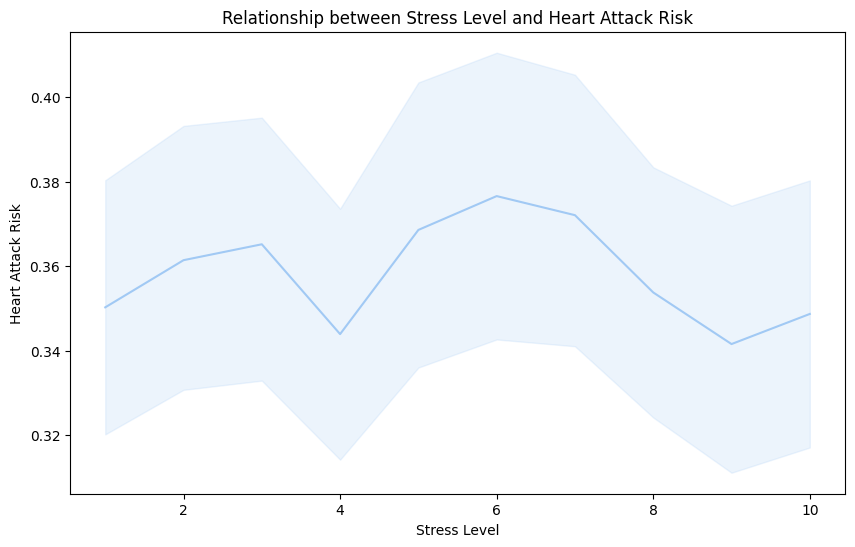

In [64]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=heartattack_df, x='Stress Level', y='Heart Attack Risk')
plt.title('Relationship between Stress Level and Heart Attack Risk')
plt.xlabel('Stress Level')
plt.ylabel('Heart Attack Risk')
plt.grid(False)
plt.show()

## Correlation between Triglycerides levels and Heart Attack risk
* Here we use Point-biserial correlation coefficient instead of default pearson because of the involvement of one binary and one continuous variable.
* Point-biserial correlation coefficient: **0.010**
*  The correlation is so weak that it is unlikely to have any meaningful impact on predicting or understanding the relationship between the variables.


In [70]:
from scipy.stats import pointbiserialr

filtered_heartattack_df = heartattack_df[heartattack_df['Heart Attack Risk'].isin([0, 1])]

corr, p_value = pointbiserialr(filtered_heartattack_df['Triglycerides'], filtered_heartattack_df['Heart Attack Risk'])

print("Point-biserial correlation coefficient:", corr)
print("p-value:", p_value)

Point-biserial correlation coefficient: 0.010471454380795548
p-value: 0.327022313259634


## Corrrelation between Sleep Duration and Heart Attack risk
* Point-biserial correlation coefficient: **-0.018**
* The negative sign suggests that as the continuous variable increases('Sleep Duration'), the binary variable('Heart Attack Risk') tends to be present less often.

In [73]:
filtered_heartattack_df = heartattack_df[heartattack_df['Heart Attack Risk'].isin([0, 1])]

corr, p_value = pointbiserialr(filtered_heartattack_df['Sleep Hours Per Day'], filtered_heartattack_df['Heart Attack Risk'])

print("Point-biserial correlation coefficient:", corr)
print("p-value:", p_value)


Point-biserial correlation coefficient: -0.018528217440292094
p-value: 0.0828569781970586
